In [85]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 23 22:02:52 2021

@author: Sandheep Gopinath
@Program : To demonstate the concept of birthday paradox

"""

def generateRandomDates(number):
    """ This function generates n number of random dates 
        It used the date function from datetime to verify 
        if a date is valid or not"""
        
    from datetime import date
    import random
    
    dobList=[]
    while len(dobList)<=number:
        dd=random.randint(1,32)
        mm=random.randint(1,13)
        yy=2021
        try:
            d=date(yy,mm,dd)
            dobList.append(d)
        except:
            pass
    return dobList



def checkProbability(dobList):
    """ The function would check probability for a list of date of births.
    It would find the number of collisions in a list and divide it
    by the total number of observations in a list to get probability"
    """
    
    sortedDobList=sorted(dobList)
    collision=0
    for i in range(len(sortedDobList)-1):
        if sortedDobList[i]==sortedDobList[i+1]:
            collision+=1
    probability=collision/len(dobList)
    return probability,collision

def sampleNtimes(numberOfSampling,maxNumberOfPeople):
    """ The function repeats the process of making a list of "maxNumberOfPeople" and finding their 
    probability of collision for each number of people. These probailities are appended as a list
    and are then added as a column in a Dataframe. 
    So the dataframe would have rows=numberOfSampling and columns=maxNumberOfPeople
    """
    
    import pandas as pd
    df=pd.DataFrame()

    for iteration in range(numberOfSampling):
        collisionsList=[]
        for i in range(0,maxNumberOfPeople):           
            l=generateRandomDates(i)
            collisionsList.append(checkProbability(l)[1])
        df[str(iteration)]=collisionsList

    return df



# Q 1. For a set of 100 people what is the probability that two people will have same birthdays

In [86]:
l=generateRandomDates(50)
p,c=checkProbability(l)
print('Probability of Collisions :',p*100,'%')
print('There were ',c,' collisions for 50 samples')

Probability of Collisions : 3.9215686274509802 %
There were  2  collisions for 50 samples


##### The number of collisions for 50 people as in above cell, can keep changing every time 
##### due to the randomness in sampling. hence repeating the same process 100 times to 
##### see the distribution

In [93]:
collisionList=[]
probabilityList=[]
for i in range(100):
    l=generateRandomDates(50)
    p,c=checkProbability(l)
    collisionList.append(c)
    probabilityList.append(p)
    

<AxesSubplot:title={'center':'Collisions Histogram'}, ylabel='Count'>

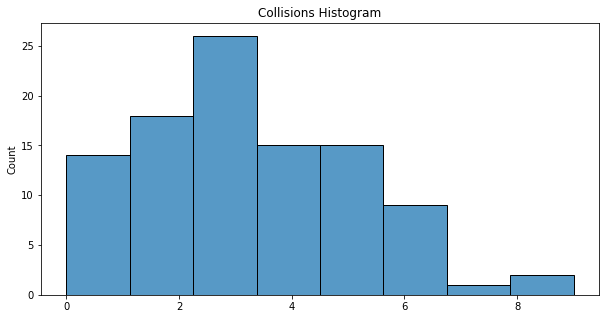

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.title('Collisions Histogram')
sns.histplot(collisionList)



### It can be seen that the maximum number of collisions that happen is 3 followed by 6 when the experiment is repeated 100 times


<AxesSubplot:title={'center':'Probabilities Histogram'}, ylabel='Count'>

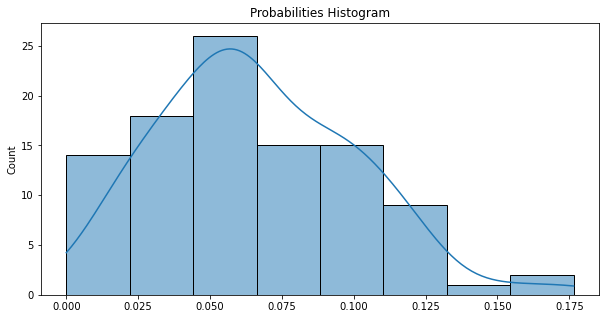

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
plt.title('Probabilities Histogram')
sns.histplot(probabilityList,kde=True)



In [96]:
import pandas as pd
pList=pd.Series(probabilityList)
pList.mean()

0.06647058823529402

### The average probability of the experiments would be between 5-7%, with mean probability being 6.5%

# Q2. From the previous question, be able to find how many people are required to make the probability x% such that 

In [97]:
# Doing the process of birthday paradox for a sample of 1-80 people and repeating
# the same process 100 times to observe the process

df=sampleNtimes(100,80).T
df.to_csv('birthdayParadox.csv')
df.shape

(100, 80)

In [98]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,0,0,0,...,2,11,8,7,4,8,8,10,7,7
1,0,0,0,0,0,0,0,0,0,0,...,8,3,5,6,5,7,8,10,2,4
2,0,0,0,0,0,0,0,0,0,0,...,5,6,9,9,7,6,5,7,7,8
3,0,0,0,0,0,0,1,0,0,0,...,3,8,9,9,6,5,12,4,5,9
4,0,0,0,0,0,1,0,0,0,0,...,4,7,5,12,11,11,3,6,10,8


In [99]:
#In this cell we are iterating over each columns. 
"""We have taken the transpose of the matrix above, which means
each columns now has the different observations for different number of poeple.
Eg : Column 1 has the different observations of probability of collisions for 1 person. 
     Column 50 has the different observations of probability of collisions for 50 people for 100 iterations. 
     We are filtering out the nummber of samples for which a collision has occured and diving it by total samples of samples taken, 
     hence giving us a picture of probability distibution"""

line=[]
for column in df.columns:
    line.append((df[df[column]!=0][column].shape[0])/100)



/home/blink/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

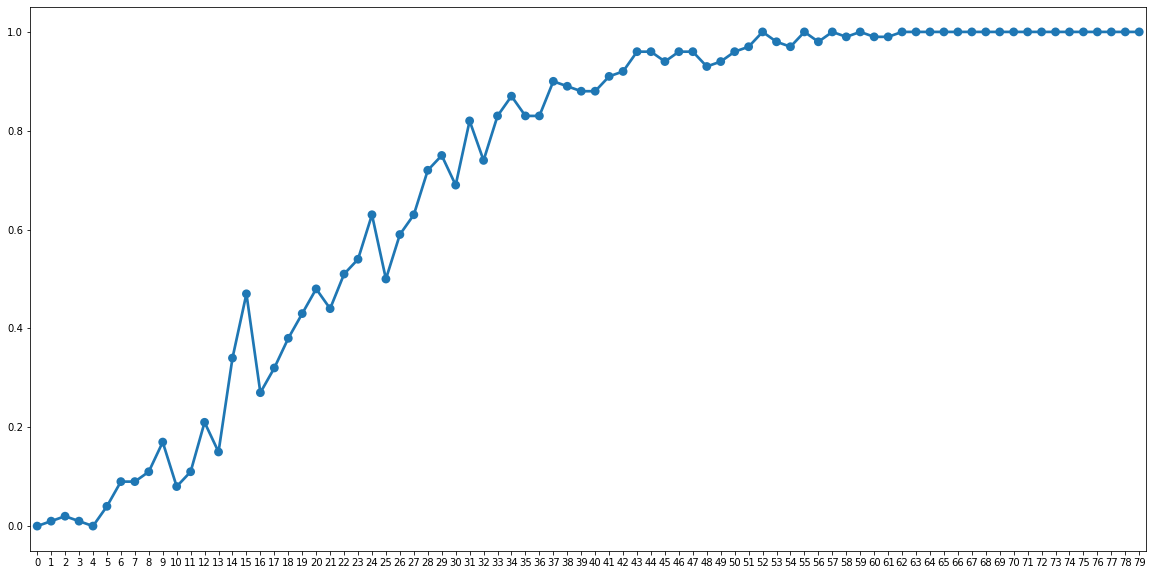

In [100]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.pointplot(df.columns,line)

## From the above graph it is clearly visible that after around 24 people in a group the probability of collisions is around or greater than 45%.


# Add comments to explain why one run of the program will not give an accurate result.. How do you solve the problem?

As done in the above cells, in question 1, a single run of the experiment would return a varying probability due to the randomness of samplig intriduced in the program .
The program may give a probability of 5% for one run, but may return 0% for the next run. 
It is to resolve this issue that we have repeated all the experiments 100 times, and used matplotlib and averaging methods to get identify the probability

In [101]:
import os
os.getcwd()

'/home/blink/Documents/Plaksha/Codes/Assignment'